In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
san_fran = "Resources/san_fran.csv"

In [13]:
san_fran = pd.read_csv(san_fran, delimiter = ", ")
san_fran[["Year", "Month", "Day"]]=san_fran["date"].str.split("/", n=2, expand=True)
san_fran.drop(columns=["date"], inplace=True)
san_fran["Year"]=san_fran["Year"].astype(int)
san_fran["Month"]=san_fran["Month"].astype(int)
#san_fran=san_fran[san_fran["Year"]>2017]
san_fran=san_fran[san_fran["Month"]<8]
bins_df = san_fran.dropna(subset = ['pm25'])
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,pm25,pm10,o3,no2,so2,co,Year,Month,Day
0,45.0,NaN,24.0,3.0,NaN,1.0,2020,7,2
1,40.0,NaN,31.0,1.0,NaN,1.0,2020,7,3
2,42.0,NaN,28.0,2.0,3,1.0,2020,7,4
3,67.0,NaN,28.0,1.0,1,1.0,2020,7,5
4,56.0,NaN,27.0,1.0,NaN,1.0,2020,7,6
...,...,...,...,...,...,...,...,...,...
2342,34.0,NaN,24.0,8.0,",",NaN,2014,3,28
2343,18.0,NaN,27.0,6.0,",",NaN,2014,3,29
2344,20.0,NaN,29.0,4.0,",",NaN,2014,3,30
2345,18.0,NaN,31.0,11.0,",",NaN,2014,3,31


In [14]:
AQI2018 = []
for value in bins_df["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]
bins_df["AQI"] = AQI2018

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
bins = [0, 50, 100, 150, 200, 300, 500]
quality = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

bins_df["Levels of Concern"]=pd.cut(bins_df["AQI"], bins, labels = quality, include_lowest = True)
bins_df.drop(columns = ["pm25", "pm10", "o3", "no2", "so2", "co"], inplace = True)
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,Day,AQI,Levels of Concern
0,2020,7,2,124.4,Unhealthy for Sensitive Groups
1,2020,7,3,112.1,Unhealthy for Sensitive Groups
2,2020,7,4,117.0,Unhealthy for Sensitive Groups
3,2020,7,5,156.9,Unhealthy
4,2020,7,6,151.3,Unhealthy
...,...,...,...,...,...
2342,2014,3,28,97.1,Moderate
2343,2014,3,29,63.4,Moderate
2344,2014,3,30,67.6,Moderate
2345,2014,3,31,63.4,Moderate


In [16]:
SanFran_agg = bins_df.groupby(["Year","Month"]).agg({"AQI":["min","max","mean", "sem"]})
sf_months = SanFran_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
sf_months

AQI                             
              min    max        mean       sem
Year Month                                    
2014 Jan     61.3  171.9  127.337931  6.394957
     Feb     57.1  121.9   81.407143  2.964200
     Mar     57.1  144.1   89.251613  4.354296
     Apr     37.5  141.6   88.486667  5.401330
     May     52.9  141.6   86.725806  4.486170
     June    37.5  151.8  103.103333  5.963877
     Jul     25.0  146.6   71.509677  6.152601
2015 Jan    107.2  176.5  149.093333  3.348971
     Feb     61.3  164.7  111.760714  5.298898
     Mar     59.2  151.8   99.223333  3.942438
     Apr     59.2  144.1   87.440000  3.713776
     May     52.9  146.6   84.887097  5.106820
     June    20.8  141.6   80.090000  5.026642
     Jul     20.8  112.1   61.083871  3.315052
2016 Jan     59.2  155.9  107.086667  5.519770
     Feb     65.5  154.9  106.496552  5.187512
     Mar     50.0  134.2   83.521429  3.863009
     Apr     69.7  136.7  106.736667  2.713858
     May     33.3  149.0  101.131034  6.248584
     June    50.0  139.2   89.858621  4.609872
     Jul     50.0  149.0   78.264516  4.767679
2017 Jan     50.0  164.7   91.386667  6.110482
     Feb     59.2  163.1   86.467857  5.487034
     Mar     45.8  149.0   85.977419  3.675711
     Apr     55.0  146.6   86.450000  4.146134
     May     57.1  154.4   96.261290  5.381805
     June    37.5  149.0   98.875862  6.118847
     Jul     57.1  146.6   94.712903  4.935646
2018 Jan     82.3  179.1  126.183871  5.455170
     Feb     71.8  164.7  112.137037  5.363874
     Mar     50.0  139.2   88.893548  3.927786
     Apr     52.9  151.3   98.692857  5.139702
     May     37.5  149.0   79.341379  4.578458
     June    55.0  149.0   95.166667  4.822727
     Jul     59.2  151.3   90.613333  3.787225
2019 Jan     50.0  163.6  105.410000  6.170138
     Feb     52.9  119.5   70.053571  2.655186
     Mar     55.0  134.2   77.941935  3.057632
     Apr     25.0  153.8   97.150000  6.741925
     May     50.0  139.2   85.580645  4.888975
     June    50.0  153.3  101.253333  5.204041
     Jul     45.8  139.2   93.054839  4.289361
2020 Jan     57.1  152.3   88.173333  3.836824
     Feb     55.0  156.9  108.882759  5.333843
     Mar     33.3  139.2   73.370968  5.217354
     Apr     41.7  141.6   77.433333  4.286312
     May     41.7  151.3   85.916129  5.428204
     June    55.0  154.9   90.223333  5.705423
     Jul     45.8  156.9   99.444000  7.189314

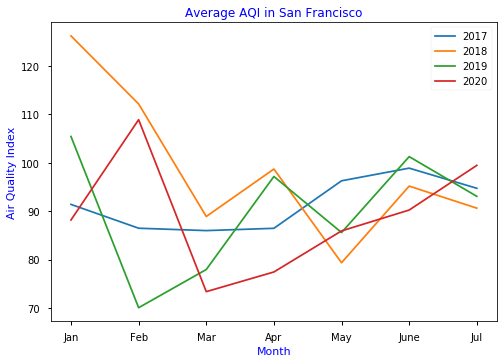

In [17]:
ax1 = sf_months["AQI"]["mean"].loc[2017].plot.line(label=2017)
ax2 = sf_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
ax3 = sf_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
ax4 = sf_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Average AQI in San Francisco", color = "blue")
plt.ylabel("Air Quality Index", color = "blue")
plt.xlabel("Month", color = "blue")
plt.legend()
plt.show()

In [18]:
sf_months_df = bins_df.groupby(["Year","Month"]).mean()
sf_months_df["AQI"] = round(sf_months_df["AQI"])
sf_months_df

AQI
Year Month       
2014 1      127.0
     2       81.0
     3       89.0
     4       88.0
     5       87.0
     6      103.0
     7       72.0
2015 1      149.0
     2      112.0
     3       99.0
     4       87.0
     5       85.0
     6       80.0
     7       61.0
2016 1      107.0
     2      106.0
     3       84.0
     4      107.0
     5      101.0
     6       90.0
     7       78.0
2017 1       91.0
     2       86.0
     3       86.0
     4       86.0
     5       96.0
     6       99.0
     7       95.0
2018 1      126.0
     2      112.0
     3       89.0
     4       99.0
     5       79.0
     6       95.0
     7       91.0
2019 1      105.0
     2       70.0
     3       78.0
     4       97.0
     5       86.0
     6      101.0
     7       93.0
2020 1       88.0
     2      109.0
     3       73.0
     4       77.0
     5       86.0
     6       90.0
     7       99.0

In [9]:
pwd

'/Users/gagethompson/Desktop/HOMEWORK/project-one'

In [19]:
sf_months_df.to_csv("project_one_csv/SanFran_months.csv")

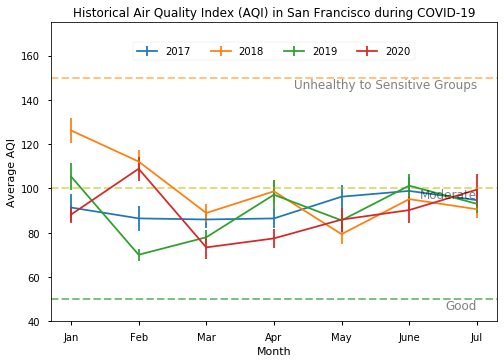

In [20]:
plt.style.use('seaborn-notebook')
sf_months["AQI"]["mean"].loc[2017].plot.line(label=2017, yerr=sf_months["AQI"]["sem"].loc[2017])
sf_months["AQI"]["mean"].loc[2018].plot.line(label=2018, yerr=sf_months["AQI"]["sem"].loc[2018])
sf_months["AQI"]["mean"].loc[2019].plot.line(label=2019, yerr=sf_months["AQI"]["sem"].loc[2019])
sf_months["AQI"]["mean"].loc[2020].plot.line(label=2020, yerr=sf_months["AQI"]["sem"].loc[2020])
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.title("Historical Air Quality Index (AQI) in Los Angeles during COVID-19")
plt.ylabel("Average AQI")
plt.legend(loc=9, bbox_to_anchor=(.5,.95),ncol=4)
plt.ylim(40, 175)
plt.title("Historical Air Quality Index (AQI) in San Francisco during COVID-19")
plt.ylabel("Average AQI")
plt.savefig("SF.png")
plt.show()